In [124]:
#Selin Hülagü
#501202405
#########################
import numpy as np
import networkx as nx
import random
import scipy
from scipy import stats
from itertools import combinations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import itertools
import statistics
import community as community_louvain
#SHORTCUTS: Alt + Enter includes new cell below, CTRL + Enter executes the current cell
##########################

## Part A: Simulate random weighted and unweighted networks

Q1-Q2

Erdos-Renyi (ER) is a graph generation algorithm based on having an edge between any two nodes with a probability that is rely on Bernoulli distribution. We can define an ER based graph G(n,p) where n denotes the node number and p denotes the probability to connect any pair of nodes, in which p is in range between 0 and 1. Given n nodes, ER graph generation algorithm will connect any pair with the probability of p, and do not connect such pair with the probability of (1-p). It is actually like flipping a biased coin for each pair of node to decide whether connect them or not. 
For a given n and p values we will get different graphs each time, where G(n,p) represents a family of graphs, in this context. For example, given n=5, p=0.2, we can have different graphs that have different edge numbers between 0 and 10, where each possible edge appears independently and with identical probability which is one of the main assumption of ER graph generation models. By using ER model, we have possiblity of having totally different connection topology except of having same number of nodes within the graphs that we've simulated, as we can have different number of edges that are joined different ends/nodes, even with the same occurance propability. On the other hand, although ER provide a simple and generic approach to generate graphs, since edges occur with the same probability, no clusters are formed, and degree distribution of ER graphs follow poisson distribution- which doesn't meet with real world graphs.
We can summarize the ER model as;
Inputs= node number (n), probability of having edge (p).
Step 1: Add n nodes
Step 2: Generate a random number between 0 and 1 for each possible pairs of nodes and decide whether connect this nodes or not, according to the random number and the given p. 

(As a part of introduction) Let's define a function to simulate random ER graph where n, p, num_graph, seed, w_lower, and w_upper respectively represent node number of the graph, probability of edge creation, number of graph we want to generate, indicator of random number generation state, lower bound for edge weight, and upper bound for edge weight.
Within the function, we first generate an undirected graph in which each step the seed is updated in order to obtain different graphs using the same probability of edge creation. Then we randomly add weight to the edges of generated graph where weights asumme to be integers between the given limit w_lower and w_lower.    

In [125]:
def ER_random_graph_generator (n, p, num_graph, seed, w_lower, w_upper):
    ER_graph_list=[]
    for i in range (0, num_graph):
        G=nx.erdos_renyi_graph(n,p, seed+i, directed=False)
        for(u,v,w) in G.edges(data=True):
            w['weight']=random.randint(w_lower,w_upper)
        ER_graph_list.append(G)
    return ER_graph_list

Q3-Q4

Maslov Sneppen (MS) algorithm handles a reference graph and generate number of random graphs holding the in- and out- connectivity (so that the degree) of each individual node. By using MS algorithm we will have graphs that have same node number, same edge number and same degree sequence as the reference graph. To generate random graphs according to the MS algorithm we need to respect one rule: rewiring the nodes by conserving the degree of each node. In this context, comparing to the ER generative models that only based on connecting nodes according to the specific probability value given without any rule/or constraint, MS algorithm is a constrainted graph generation algorithm where node degrees are holded. One of the main intention to generate MS algorithm throught a reference graph is to identify its(reference graph) important non-random topological patterns. It is said to be MS algorithm is computationally efficient approach (Fornito et al. 2016),however I am in doubt about it. Lets consider a graph with 500 nodes in which each node has connection with the 0.1 of the rest of the nodes (so that each node has nearly 50 degrees). In rewiring process, for each node we can have different rewiring options within the combination of C(499, 50), which is quite huge. Thats why I also had struggles trying to generate MS graphs with 200 nodes. 

(As a part of introduction) By defining MS_random_graph_generator we can generate a number of graphs (num_graph) based on MS algorithm, considering a reference graph (RefG), by using networkx library code. 

In [126]:
def MS_random_graph_generator (RefG, num_graph):
    MS_graph_list=[]
    for i in range(0,num_graph):
        G=nx.random_reference(RefG)
        MS_graph_list.append(G)
    return MS_graph_list

In question, n is given as 200, and num_graph as 20. It is assume that edges' weights are between 1 and 10, and the probability of edge creation is 0.4 for ER generative model. Please note that anything related with ER graphs are denoted with 'anything_ER' and for MS graphs 'anything_MS' 

In [127]:
num_graph=20
n=200

In [128]:
ER_graph_list=(ER_random_graph_generator(n, 0.4, num_graph, 9999, 1, 100))

As the node number increases, the combination for each node to connect any other node by conserving its degree increases in MS algorithm. In this context as reference graph, tree graph is considered in order to decrease the computational time where each node has very slight number of connections. (I spend so much hours to generate random MS graphs with 200 nodes, so that I come up with this solution, please fell free to code RefG=nx.random_reference(n,0.4) to get the results for MS graphs for graphs having more distributed degree of nodes, and maybe more interpretable results.)  

In [129]:
RefG=nx.random_tree(n)
MS_graph_list=(MS_random_graph_generator(RefG, num_graph))

Q5

Sample graphs that are generated according to the ER and MS models are given in Figure 1. Although two of the graphs have same number of nodes, as it is seen from Figure 1, since p is 0.4, ER graph is highly interconnected, where nodes included in MS graphs have low degrees because of the nature of their reference graph. 

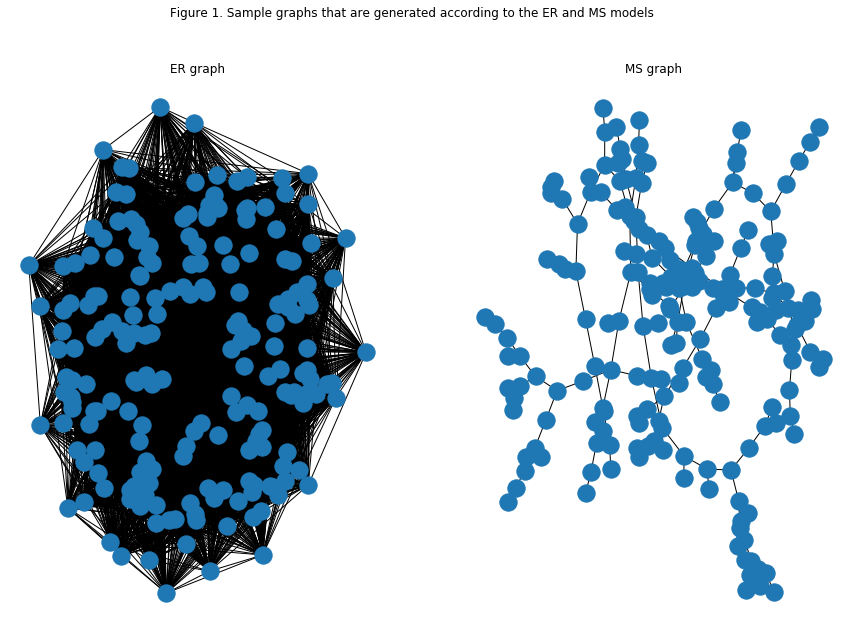

In [130]:
fig= plt.figure(figsize=(15,10))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
nx.draw(ER_graph_list[0], ax=ax1)
nx.draw(MS_graph_list[0],ax=ax2)
ax1.set_title('ER graph')
ax2.set_title('MS graph')
fig.suptitle('Figure 1. Sample graphs that are generated according to the ER and MS models')
plt.show()

## Part B: Analyzing Erdos-Renyi and Maslov-Sneppen graphs using centrality measures

Within Part B, it is asked for calculating Centrality Measure Correlation(CMC)s based on 17 centrality measures, and visualize them. Lets start by defining all the centrality measures one by one:

Degree (DC)

Node degree centrality is calculated as the sum of the edge weights for edges incident to that node for ER graphs, and the number of edges adjacent to the node for MS graphs. To calculate DC for each graph, networkx library is used. 

In [131]:
DC_ER=[[0]*n]*num_graph
DC_MS=[[0]*n]*num_graph
for i in range (0, num_graph):
        DC_ER[i]= [val for (node,val) in ER_graph_list[i].degree(weight='weight')]
        DC_MS[i]= [val for (node,val) in MS_graph_list[i].degree]

Eigenvector (EC)

Considering weighted (for ER) and unweighted (for MS) adjacency matrix, eigenvector centrality measures the centrality for a node considering both its and its neigbors' degrees. To calculate EC for each graph, networkx_numpy library is used which has better computational time comparing with the networkx. 

In [132]:
EC_ER=[[0]*n]*num_graph
EC_MS=[[0]*n]*num_graph
for i in range (0, num_graph):
    EC_ER[i]= list(nx.eigenvector_centrality_numpy(ER_graph_list[i], weight='weight',max_iter=99999).values())
    EC_MS[i]= list(nx.eigenvector_centrality_numpy(MS_graph_list[i], max_iter=99999).values())

Katz (KC)

Katz centrality can be seen as the generalization of eigenvector centrality. It penalizes the distant connections by alpha factor and gives extra weight to immediate neighbors that is provided with beta parameter. Following two codes are generated to calculate Kalz Centrality values for ER and MS graphs in particular according to the formula given in Oldham et al. (2019), where alpha and beta values are set to respectively 0.9 and 1 referring to Oldham et al. (2019).   

In [133]:
EC=np.array(EC_ER)
KC_ER=[]
A=[nx.adjacency_matrix(ER_graph_list[i], weight='weight').todense() for i in range (0, len(ER_graph_list))]
A=np.asarray(A)
for u in range(0, num_graph):
    for i in range(0, len(ER_graph_list[u])):
        sumAi=0
        for j in range(0,len(ER_graph_list[u])):
            sumAi+=A[u][j][i]*EC[u][j]
        KC_ER.append((sumAi*0.9)+1)
KC_M=np.array(KC_ER)
shape=(num_graph,n)
KC_ER=KC_M.reshape(shape)

In [134]:
MS=np.array(EC_MS)
KC_MS=[]
A=[nx.adjacency_matrix(MS_graph_list[i]).todense() for i in range (0, len(MS_graph_list))]
A=np.asarray(A)
for u in range(0, num_graph):
    for i in range(0, len(MS_graph_list[u])):
        sumAi=0
        for j in range(0,len(MS_graph_list[u])):
            sumAi+=A[u][j][i]*MS[u][j]
        KC_MS.append((sumAi*0.9)+1)
KC_MM=np.array(KC_MS)
shape=(num_graph,n)
KC_MS=KC_MM.reshape(shape)

PageRank (PC)

PageRank centrality can be seen as a variant of eigenvector centrality where not only the number of connection of a node and its neighbors, but also the in-degree of such node is considered, as Page et al. (1998) referred the in-degree as backlinks. The networkx library code is used to calculate PC where personalization vector is assumed to fit with uniform distribution and alpha (penalty term) is set to 0.9, with the same reason as in KC calculation. 

In [135]:
PR_ER=[[0]*n]*num_graph
PR_MS=[[0]*n]*num_graph
for i in range (0, num_graph):
    PR_ER[i]=list(nx.pagerank(ER_graph_list[i], alpha=0.9, max_iter=10000, weight='weight').values())
    PR_MS[i]=list(nx.pagerank(MS_graph_list[i], alpha=0.9, max_iter=10000,).values())

Shortest-path Closeness (CC)

Closeness centrality of a node (which is defined as shortest-path closenes centrality in Oldham et al., 2019) is defined as the inverse of its average shortest path length to all other node. The networkx library code is used to calculate CC, where for ER graphs shortest path are calculated with weight values of the edges. Although Oldham et al. 2019 used N nodes while calculating CC, here CC value is calculated with N-1 as we saw in the lectures.      

In [136]:
CC_ER=[[0]*n]*num_graph
CC_MS=[[0]*n]*num_graph
for i in range (0, num_graph):
    CC_ER[i]=list(nx.closeness_centrality(ER_graph_list[i], distance='weight').values())
    CC_MS[i]=list(nx.closeness_centrality(MS_graph_list[i]).values())


Shortest-path Betweenness (BC)

Betweeness centrality of node i,(which is defined as shortest-path betweenness centrality in Oldham et al., 2019) measures the proportion of shortest paths between all node pairs in a graph that pass through the node i. So that it indexes which node lies beween other pair of nodes. The networkx library code is used to calculate BC, where for ER graphs shortest path are calculated with weight values of the edges. Although Oldham et al. 2019 doesn't normalize the BC value, I prefer to use the formulation that we saw on the lecture that normalize the BC values, and leave normalize=True, as default.    

In [137]:
BC_ER=[[0]*n]*num_graph
BC_MS=[[0]*n]*num_graph
for i in range (0, num_graph):
    BC_ER[i]=list(nx.betweenness_centrality(ER_graph_list[i], weight='weight').values())
    BC_MS[i]=list(nx.betweenness_centrality(MS_graph_list[i]).values())

Subgraph (SC)

Subgraph centrality of node i is the sum of weighted closed walk of all length starting and ending at node i and is found using the matrix exponential of the adjacency matrix of given graph. The networkx_numpy libraries code is used to calculate SC.

In [138]:
SC_ER=[[0]*n]*num_graph
SC_MS=[[0]*n]*num_graph
for i in range (0, num_graph):
    SC_ER[i]=list(nx.subgraph_centrality_exp(ER_graph_list[i]).values())
    SC_MS[i]=list(nx.subgraph_centrality_exp(MS_graph_list[i]).values())

Information (IC)

Information centrality is variant of closeness centrality based on effective resistance between nodes in a network. It quantify how easy a node is reached by paths from other nodes. The networkx_numpy libraries code is used to calculate IC, considering the edge weights for ER graphs.

In [139]:
IC_ER=[[0]*n]*num_graph
IC_MS=[[0]*n]*num_graph
for i in range (0, num_graph):
    IC_ER[i]=list(nx.information_centrality(ER_graph_list[i],weight='weight').values())
    IC_MS[i]=list(nx.information_centrality(MS_graph_list[i]).values())

Communicability betweenness (CBC)

CBC is calculated by using networkx library code. High CBC value refers to the taking part highly in many walks between pairs of other nodes. Please note that some CBC values return as -nan- (since the numerator of the division on CBC sometimes return as zero so that the division is return with a math error) considering the low degrees of nodes in which generally there is no any walk between nodes p and q involving node i.

In [140]:
CBC_ER=[[0]*n]*num_graph
CBC_MS=[[0]*n]*num_graph
for i in range (0, num_graph):
    CBC_ER[i]=list(nx.communicability_betweenness_centrality(ER_graph_list[i]).values())
    CBC_MS[i]=list(nx.communicability_betweenness_centrality(MS_graph_list[i]).values())

C:\Users\Lenovo\anaconda3\lib\site-packages\networkx\algorithms\centrality\subgraph_alg.py:246: RuntimeWarning: divide by zero encountered in true_divide
  B = (expA - scipy.linalg.expm(A.A)) / expA
C:\Users\Lenovo\anaconda3\lib\site-packages\networkx\algorithms\centrality\subgraph_alg.py:246: RuntimeWarning: invalid value encountered in true_divide
  B = (expA - scipy.linalg.expm(A.A)) / expA
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\_methods.py:38: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Random-walk betweenness (RWBC)

RWBC is calculated by using networkx library code. High RBWC value refers to the taking part highly in many random walks between pairs of other nodes.

In [141]:
RWBC_ER=[[0]*n]*num_graph
RWBC_MS=[[0]*n]*num_graph
for i in range (0, num_graph):
    RWBC_ER[i]=list(nx.current_flow_betweenness_centrality(ER_graph_list[i],weight='weight').values())
    RWBC_MS[i]=list(nx.current_flow_betweenness_centrality(MS_graph_list[i]).values())

Leverage (LC)

In leverage centrality we are quantifying nodes by checking whether they have higher degree. Following two codes are generated to calculate Leverage Centrality values for ER and MS graphs in particular respecting to the equations given in Oldham et al. (2019). 

In [142]:
LC_ER=[]
for u in range(0,len(ER_graph_list)):
    for i in ER_graph_list[u]:
        DegreeI=ER_graph_list[u].degree(nbunch=i,weight='weight')
        NeighboorsI=[n for n in ER_graph_list[u].neighbors(i)]
        N_degrees=[val for (node,val) in ER_graph_list[u].degree(nbunch=NeighboorsI,weight='weight')]
        LCSum=0
        for j in range (0, len(N_degrees)):
            k=(DegreeI-N_degrees[j])/(DegreeI+N_degrees[j])
            LCSum+=k
        LC_ER.append((1/DegreeI)*k)
LC_M=np.array(LC_ER)
shape=(num_graph,n)
LC_ER=LC_M.reshape(shape)

In [143]:
LC_MS=[]
for u in range(0,len(MS_graph_list)):
    for i in MS_graph_list[u]:
        DegreeI=MS_graph_list[u].degree(nbunch=i)
        NeighboorsI=[n for n in MS_graph_list[u].neighbors(i)]
        N_degrees=[i for (node,i) in MS_graph_list[u].degree(nbunch=NeighboorsI)]
        LCSum=0
        for j in range (0, len(N_degrees)):
            k=(DegreeI-N_degrees[j])/(DegreeI+N_degrees[j])
            LCSum+=k
        LCSum=(1/DegreeI)*LCSum
        LC_MS.append(LCSum)
LC_MS_M=np.array(LC_MS)
shape=(num_graph,n)
LC_MS=LC_MS_M.reshape(shape)

Bridging (BridC)

Bridging centrality calculated as the product of betweenness centrality and bridging coefficient which is defined as the division of reciprocal of degree i to sum of the reciprocal of its neighbors degrees. Following two codes are generated to calculate Bridging Centrality values for ER and MS graphs in particular  respecting to the equations given in Oldham et al. (2019). 

In [144]:
BridC_ER=[]
for u in range(0,len(ER_graph_list)):
    for i in ER_graph_list[u]:
        DI=(ER_graph_list[u].degree(nbunch=i,weight='weight'))
        N=[n for n in ER_graph_list[u].neighbors(i)]
        Nd=[val for (node,val) in ER_graph_list[u].degree(nbunch=N,weight='weight')]
        B_sum=0
        for j in range (0, len(Nd)):
            B_sum+=1/Nd[j]
        BridC_ER.append(((1/DI)/B_sum)* BC_ER[u][i])
BridC_M=np.array(BridC_ER)
shape=(num_graph,n)
BridC_ER=BridC_M.reshape(shape)

In [145]:
BridC_MS=[]
for u in range(0,len(MS_graph_list)):
    for i in MS_graph_list[u]:
        DI=(MS_graph_list[u].degree(nbunch=i))
        N=[n for n in MS_graph_list[u].neighbors(i)]
        Nd=[val for (node,val) in MS_graph_list[u].degree(nbunch=N)]
        B_sum=0
        for j in range (0, len(Nd)):
            B_sum+=1/Nd[j]
        BridC_MS.append(((1/DI)/B_sum)* BC_MS[u][i])
BridC_M=np.array(BridC_MS)
shape=(num_graph,n)
BridC_MS=BridC_M.reshape(shape)

Laplacian (LAPC)

Laplacian centrality quantifies each node by using node degrees to asses the impact of their removal from a graph. Following two codes are generated to calculate Laplacian Centrality values for ER and MS graphs in particular respecting to the equations given in Oldham et al. (2019).

In [146]:
LAPC_ER=[]
for u in range(0,len(ER_graph_list)):
    for i in ER_graph_list[u]:
        DI=1/(ER_graph_list[u].degree(nbunch=i,weight='weight'))
        N=[n for n in ER_graph_list[u].neighbors(i)]
        Nd=[val for (node,val) in ER_graph_list[u].degree(nbunch=N,weight='weight')]
        LA_sum=0
        for j in range (0, len(Nd)):
            LA_sum+=Nd[j]
        LAPC_ER.append((DI*DI)+DI+2*LA_sum)
LAPC_M=np.array(LAPC_ER)
shape=(num_graph,n)
LAPC_ER=LAPC_M.reshape(shape)

In [147]:
LAPC_MS=[]
for u in range(0,len(MS_graph_list)):
    for i in MS_graph_list[u]:
        DI=1/(MS_graph_list[u].degree(nbunch=i))
        N=[n for n in MS_graph_list[u].neighbors(i)]
        Nd=[val for (node,val) in MS_graph_list[u].degree(nbunch=N)]
        LA_sum=0
        for j in range (0, len(Nd)):
            LA_sum+=Nd[j]
        LAPC_MS.append((DI*DI)+DI+2*LA_sum)
LAPC_M=np.array(LAPC_MS)
shape=(num_graph,n)
LAPC_MS=LAPC_M.reshape(shape)

Total Communicablity (TCC)

TCC measures how a node is easily reached by a walk from any other node. Following two codes are generated to calculate TCC values for ER and MS graphs in particular respecting to the equations given in Oldham et al. (2019). 

In [148]:
TCC_ER=[]
for u in range(0,len(ER_graph_list)):
    nodelist=list(ER_graph_list[u])
    A = nx.to_numpy_array(ER_graph_list[u], nodelist)
    A[A != 0.0] = 1
    expA = scipy.linalg.expm(A)
    for i in ER_graph_list[u]:
        TC_sum=0
        for j in range (0, len(ER_graph_list[u])):
            TC_sum+=expA[j][i]
        TCC_ER.append(TC_sum)
TCC_M=np.array(TCC_ER)
shape=(num_graph,n)
TCC_ER=TCC_M.reshape(shape)

In [149]:
TCC_MS=[]
for u in range(0,len(MS_graph_list)):
    nodelist=list(ER_graph_list[u])
    A = nx.to_numpy_array(MS_graph_list[u], nodelist)
    A[A != 0.0] = 1
    expA = scipy.linalg.expm(A)
    for i in MS_graph_list[u]:
        TC_sum=0
        for j in range (0, len(MS_graph_list[u])):
            TC_sum+=expA[j][i]
        TCC_MS.append(TC_sum)
TCC_M=np.array(TCC_MS)
shape=(num_graph,n)
TCC_MS=TCC_M.reshape(shape)

Participation Coefficient

Participation coefficient measures the distribution of a node's edges among different topological modules of a graph. So that if a node is only connected to its specific module, its participation coefficient returns as 0. Following code is used to calculate PC values https://github.com/CarloNicolini/pyconnectivity/blob/master/community.py) where modules are determined using networkx library. 

In [150]:
def participation_coefficient(graph, partition, weighted=False):
    '''
    Computes the participation coefficient for each node (Guimera et al. 2005).
    ------
    Inputs
    ------
    graph = Networkx graph
    partition = modularity partition of graph
    ------
    Output
    ------
    Dictionary of the participation coefficient for each node.
    '''
    # this is because the dictionary output of Louvain is "backwards"
    new_part = {}
    for m, n in zip(partition.values(), partition.keys()):
        try:
            new_part[m].append(n)
        except KeyError:
            new_part[m] = [n]
    partition = new_part
    pc_dict = {}
    all_nodes = set(graph.nodes())
    # loop through modules
    if not weighted:
        for m in partition.keys():
            # set of nodes in modules
            mod_list = set(partition[m])
            # set of nodes outside that module
            between_mod_list = list(set.difference(all_nodes, mod_list))
            for source in mod_list:
                # degree of node
                degree = float(nx.degree(G=graph, nbunch=source))
                count = 0
                # between module degree
                for target in between_mod_list:
                    if (source, target) in graph.edges() or(source, target) in graph.edges():
                        count += 1
                bm_degree = float(count)
                if bm_degree == 0.0:
                    pc = 0.0
                else:
                    pc = 1 - ((float(bm_degree) / float(degree)) ** 2)
                pc_dict[source] = pc
        return pc_dict
        # this is because the dictionary output of Louvain is "backwards"
    if weighted:
        for m in partition.keys():
            # set of nodes in modules
            mod_list = set(partition[m])
            # set of nodes outside that module
            between_mod_list = list(set.difference(all_nodes, mod_list))
            for source in mod_list:
                # degree of node
                degree = 0
                edges = graph.edges([source], data=True)
                for edge in edges:
                    degree += graph.get_edge_data(edge[0], edge[1])['weight']
                count = 0
                # between module degree
                for target in between_mod_list:
                    if (source, target) in graph.edges() or(source, target) in graph.edges():
                        count += graph.get_edge_data(source, target)['weight']
                        # i assume this will only get one weighted edge.
                        count += graph.get_edge_data(target, source)['weight']
                bm_degree = float(count)
                if bm_degree == 0.0:
                    pc = 0.0
                else:
                    pc = 1 - ((float(bm_degree) / float(degree)) ** 2)
                pc_dict[source] = pc
        return pc_dict


In [151]:
PC_ER=[[0]*n]*num_graph
PC_MS=[[0]*n]*num_graph
for i in range (0, num_graph):
    PE=community_louvain.best_partition(ER_graph_list[i])
    PC_ER[i]=list(participation_coefficient(ER_graph_list[i],PE, weighted=True).values())
    PM=community_louvain.best_partition(MS_graph_list[i])
    PC_MS[i]=list(participation_coefficient(MS_graph_list[i],PM).values())

All centrality measures can be summed in list CM.

In [152]:
CM_ER=list([DC_ER[i], EC_ER[i], KC_ER[i], PR_ER[i],CC_ER[i],BC_ER[i], SC_ER[i], IC_ER[i],CBC_ER[i], RWBC_ER[i], LC_ER[i], BridC_ER[i], LAPC_ER[i], TCC_ER[i], PC_ER[i]] for i in range(num_graph))
CM_MS=list([DC_MS[i], EC_MS[i], KC_ER[i], PR_MS[i],CC_MS[i],BC_MS[i], SC_MS[i], IC_MS[i],CBC_MS[i], RWBC_MS[i], LC_MS[i], BridC_MS[i], LAPC_MS[i], TCC_MS[i], PC_ER[i]] for i in range(num_graph))

Q1

Pairwise CMC values for all centrality measures derived can be calculated with following codes for ER and MS graphs in particular

In [153]:
CMC_ER=[[scipy.stats.spearmanr(*comb) for comb in combinations(CM_ER[i], 2)] for i in range(0, num_graph)]
rho_ER=[]
for i in range(0, len(CMC_ER)):
    for j in range(0, len(CMC_ER[i])):
        Rho, Pval= CMC_ER[i][j]
        rho_ER.append(Rho)
rho_ER_m=np.array(rho_ER)
shape=(num_graph,len(CMC_ER[0]))
rho_ER=rho_ER_m.reshape(shape)

In [154]:
CMC_MS=[[scipy.stats.spearmanr(*comb) for comb in combinations(CM_MS[i], 2)] for i in range(0, num_graph)]
rho_MS=[]
for i in range(0, len(CMC_MS)):
    for j in range(0, len(CMC_MS[i])):
        Rho, Pval= CMC_MS[i][j]
        rho_MS.append(Rho)
rho_MS_m=np.array(rho_MS)
shape=(num_graph,len(CMC_MS[0]))
rho_MS=rho_MS_m.reshape(shape)

Distribution of CMCs values is visualized in Figure 2, for MS and ER graphs separately. 

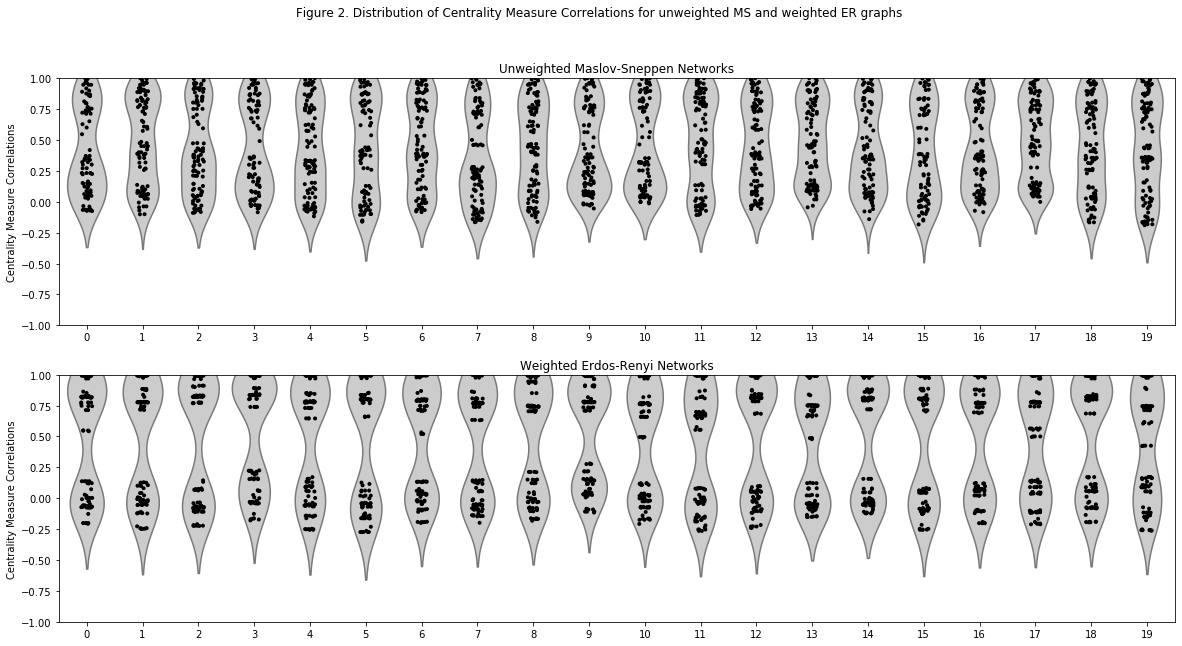

In [155]:
fig= plt.figure(figsize=(20,10))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)

data_to_plot1 = list(rho_ER[i] for i in  range(0, num_graph))
sns.violinplot(data=data_to_plot1, color="0.8", ax=ax2, inner=None)
sns.stripplot(data=data_to_plot1, jitter=True,zorder=3, color="black", ax=ax2, size=4)

data_to_plot2 = list(rho_MS[i] for i in  range(0, num_graph))
sns.violinplot(data=data_to_plot2, color="0.8", ax=ax1, inner=None)
sns.stripplot(data=data_to_plot2, jitter=True,zorder=3, color="black", ax=ax1, size=4)

ax1.set(ylim=(-1,1))
ax1.set_title('Unweighted Maslov-Sneppen Networks')
ax1.set_ylabel('Centrality Measure Correlations')
ax2.set_title('Weighted Erdos-Renyi Networks')
ax2.set_ylabel('Centrality Measure Correlations')
ax2.set(ylim=(-1,1))
fig.suptitle('Figure 2. Distribution of Centrality Measure Correlations for unweighted MS and weighted ER graphs')
plt.show()

Q2

From Figure 2 it is seen that CMCs values for unweighted MS graphs have high probability to correlated positively. We can see that for some MS graphs (i.e. 1, 4, 7, 8, 18) positive CMCs values have nearly same probablity which result to have kind a rectangular shape (there is no any obvious peak), where positive CMCs values varied however nearly equally distributed. However, although we preserve the node numbers and their degrees as well, we can see that CMCs distribution varies among MS graphs, where some have a distribution with more than one peak (i.e. 9, 10, 16). Generally speaking on CMCs values for MS graphs, we can say that, they are tend to have more probability of lowly positive or negative correlated both in two-peaked graphs and nearly-eqaually distributed ones. So again generally speaking, we can say that centrality measures mostly reveal a unique characteristics for MS graphs, where the redundant ones will be noticed with Figure 3.  
By looking at to the weighted ER graphs, we can see that CMCs values are either highly correlated or slightly correlated, where all ER graph distributions show two peaks, in which the peak of high correlation is higher. It means that for given weighted ER graphs some centrality measures are clearly distincted from others where they reveal unique property to compare the ER graphs, where some reveals similar characteristics of given graph. It is also seen that CMCs values tend to show high probability on having high correlation in compare to MS graphs, by looking at the probability where CMC=1. So that, we can say that there are more distinct centrality measures that can reveal unique properties of MS graphs, compare to the ER graphs. I think that this is not only because of the generation algorithm, is also depends on the graph type that we are comparing (In MS algorithm tree graph is used).

Q3

In order to compare the correlation between the pairs of centrality measures, empty dataframes are generated and filled by the mean between network CMC values and standard deviation of CMCs across networks

In [156]:
columns=['DC', 'EC', 'KC','PR','CC','BC','SC','IC','CBC', 'RBWC', 'LC', 'BridC', 'LAPC', 'TCC', 'PC']
index=['DC', 'EC', 'KC','PR','CC','BC','SC','IC','CBC','RBWC', 'LC', 'BridC', 'LAPC', 'TCC', 'PC']
Mean_CMC_ER=pd.DataFrame(index=index, columns=columns)
Std_CMC_ER=pd.DataFrame(index=index, columns=columns)
Mean_CMC_MS=pd.DataFrame(index=index, columns=columns)
Std_CMC_MS=pd.DataFrame(index=index, columns=columns)

In [157]:
for k in range (0, len(CM_ER[0])):
    for j in range(0, len(CM_ER[0])):
        r=0
        for i in range (0, len(CM_ER)):
            Rho, Pval=scipy.stats.spearmanr(CM_ER[i][k],CM_ER[i][j])   
            r+=Rho
        mean=(r/num_graph)
        Mean_CMC_ER.iloc[k][j]=mean
Mean_CMC_ER=Mean_CMC_ER.astype(float)

for k in range (0, len(CM_MS[0])):
    for j in range(0, len(CM_MS[0])):
        r=0
        for i in range (0, len(CM_MS)):
            Rho, Pval=scipy.stats.spearmanr(CM_MS[i][k],CM_MS[i][j])   
            r+=Rho
        mean=(r/num_graph)
        Mean_CMC_MS.iloc[k][j]=mean
Mean_CMC_MS=Mean_CMC_MS.astype(float)


In [158]:
for k in range (0, len(CM_ER[0])):
    for j in range(0, len(CM_ER[0])):
        r=[]
        for i in range (0, len(CM_ER)):
            Rho, Pval=scipy.stats.spearmanr(CM_ER[i][k],CM_ER[i][j])   
            r.append(Rho)
        std=statistics.stdev(r)
        Std_CMC_ER.iloc[k][j]=std
Std_CMC_ER=Std_CMC_ER.astype(float)

In [159]:
for k in range (0, len(CM_MS[0])):
    for j in range(0, len(CM_MS[0])):
        r2=[]
        for i in range (0, len(CM_MS)):
            Rho, Pval=scipy.stats.spearmanr(CM_MS[i][k],CM_MS[i][j])   
            r2.append(Rho)
        std=statistics.stdev(r2)
        Std_CMC_MS.iloc[k][j]=std
Std_CMC_MS=Std_CMC_MS.astype(float)

Lets visualize what we've found so far

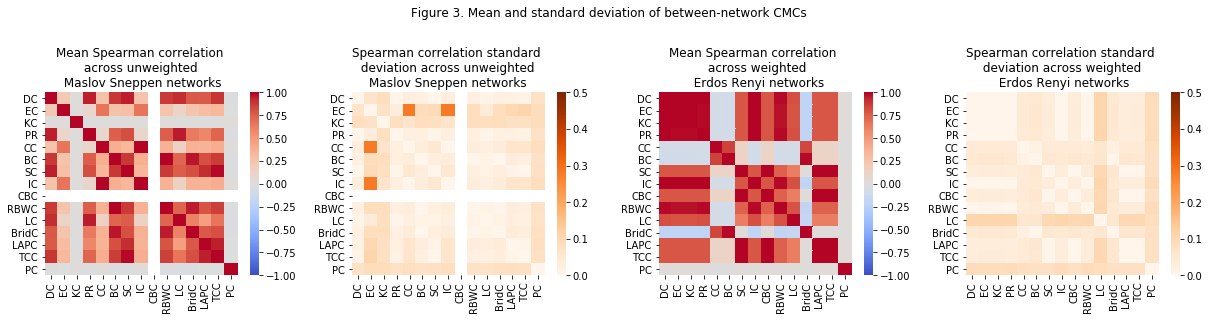

In [170]:
fig= plt.figure(figsize=(17,4))
ax1=fig.add_subplot(141)
ax2=fig.add_subplot(142)
ax3=fig.add_subplot(143)
ax4=fig.add_subplot(144)
sns.heatmap(Mean_CMC_ER,vmin=-1, vmax=1, cmap="coolwarm", ax=ax3)
sns.heatmap(Std_CMC_ER, vmin=0, vmax=0.5, cmap="Oranges", ax=ax4)
sns.heatmap(Mean_CMC_MS, vmin=-1, vmax=1, cmap="coolwarm", ax=ax1)
sns.heatmap(Std_CMC_MS, vmin=0, vmax=0.5, cmap="Oranges", ax=ax2)
ax1.set_title('Mean Spearman correlation \n across unweighted \n Maslov Sneppen networks')
ax2.set_title('Spearman correlation standard \n deviation across unweighted \nMaslov Sneppen networks')
ax3.set_title('Mean Spearman correlation \n across weighted\n  Erdos Renyi networks')
ax4.set_title('Spearman correlation standard \n deviation across weighted \n Erdos Renyi networks')
fig.suptitle('Figure 3. Mean and standard deviation of between-network CMCs', y=1.1)
plt.tight_layout()


Q4

Findings derived from Figure 3 actually support the findings of Figure 2. Additionally, the redundant centrality measures can now clearly distinct especially for ER graphs. It is seen that DC, EC, KC, and PR centralities are highly correlated in ER graphs and can be seen as redundant centrality measures, where LAPC, TCC, and BridC are highly correlated each other as well. BC and CC values are  not strictly correlated with other centrality measure but they are highly correlated with each other and BridC. Low correlation of CC and BC with other centrality measures supports the information that the path lenghts are one of the commonly used topological metrics in ER graphs (Fornito et al. 2016), where CC and BC shows unique characteristics of ER graphs. PC has lowest average correlation with the other centrality measures, since it depends on the modular decompositon of a graph. 

As tree-type graph is selected as reference graph of MS algortihm, CBC values return as -nan- (since the numerator of the division on CBC sometimes return as zero so that the division is return with a math error), considering the low degrees of nodes in which generally there is no any walk between nodes p and q involving node i. For MS graphs, we can see that centrality measures show low pairwise correlation compare to the ER graphs. That can be either because of MS graph is tree type, or unweighted, or both. To reveal the main reason we need to do add  more comparisons as weighted MS graph and unweighted ER graphs, but I think that it is mainly because of the tree type of MS graphs. KC, PC, and EC shows low correlation with other centrality measures, where TCC and LAPC are highly correlated with each other.  There are also pairwise highly correlated centrality measures (i.e. PR-LC, BridC-RBWC), and as it is expected from the tree type of MS graph, DC shows high correlation with other centrality measures. Since KC gives weight to the immediate neighbors, it makes sense that KC reveals an unique characteristic for tree bases MS graphs.

As we discuss on Figure 2, CMCs values are likely to be more distributed with similar probabilities in MS graphs as it is seen from Figure 3 with the standard deviation heatmap, where relatively high standard deviation of ER graphs can be seen as well.      

Q5

From the distribution of CMC that is given in Figure 4, we can see from the meadian values that in unconstrainted weighted ER graph, centrality measures tend to correlate higher than constrainted unweighted MS graph. We again see that ER graphs are less consistent in CMC values where the range between its quartile is bigger than MS graphs. We again see that although we generally have high correlated centrality measure in ER graphs, within some centrality measures we also have low correlation which can reveal the unique characteristics of such graphs. Where for MS graphs is kind a vice-versa. Centrality measures are generally low correlated, where some also have high correlations.

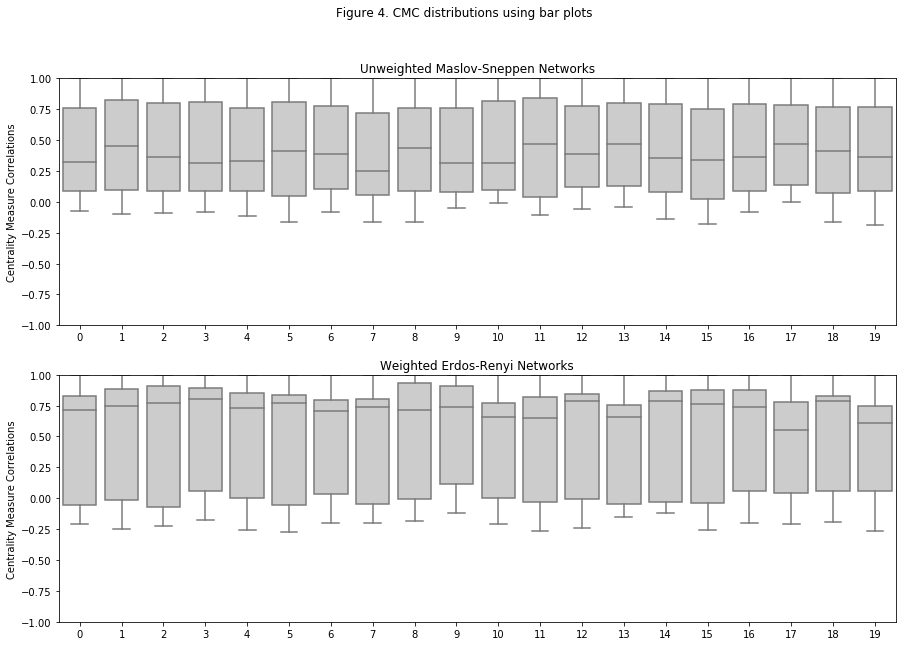

In [161]:
fig= plt.figure(figsize=(15,10))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
sns.boxplot(data=data_to_plot1, color="0.8", ax=ax2)
sns.boxplot(data=data_to_plot2, color="0.8", ax=ax1)

ax1.set(ylim=(-1,1))
ax1.set_title('Unweighted Maslov-Sneppen Networks')
ax1.set_ylabel('Centrality Measure Correlations')
ax2.set_title('Weighted Erdos-Renyi Networks')
ax2.set_ylabel('Centrality Measure Correlations')
ax2.set(ylim=(-1,1))
fig.suptitle('Figure 4. CMC distributions using bar plots')
plt.show()

## Part C: Association between mean within-network Centrality Measure Correlation (CMC) and network properties

Assortativity and Connection Density as network property is selected to reveal the relationship with mean within-network CMC. Assortativity measures the tendency of nodes to connect to similar nodes in terms of degree centrality. To calculate assortativity, networkx library code is used, which is based on the same equation as Oldham et al., 2019. Connection density is the proportion of all possible connections in a network that exists. Networkx code is used to calculate connection efficiency with has the same eqaution as Oldham et al. (2019) proposed.

Dataframes for MS and ER graphs are generated seprately and together as well in order to calculate p values between mean CMC and selected network properties for all graphs.

In [162]:
index=[i for i in range (0, len(CM_ER))]
columns=['MeanCMC', 'Assortativity','ConnectionDensity']
PartC_ER=pd.DataFrame(columns=columns, index=index)
for k in range(0, len(rho_ER)):
    s=0
    for i in range(0, len(rho_ER[0])):
        s+=rho_ER[k][i]
    mean=(s/len(rho_ER[0]))
    PartC_ER.iloc[k][0]=mean
for i in range (0, len(ER_graph_list)):
    PartC_ER.iloc[i][1]=nx.degree_assortativity_coefficient(ER_graph_list[i], weight='weight')
for i in range (0, len(ER_graph_list)):
    PartC_ER.iloc[i][2]=nx.density(ER_graph_list[i])    

In [163]:
PartC_MS=pd.DataFrame(columns=columns, index=index)
for k in range(0, len(rho_MS)):
    s=0
    for i in range(0, len(rho_MS[0])):
        s+=rho_MS[k][i]
    mean=(s/len(rho_MS[0]))
    PartC_MS.iloc[k][0]=mean
for i in range (0, len(MS_graph_list)):
    PartC_MS.iloc[i][1]=nx.degree_assortativity_coefficient(MS_graph_list[i])
for i in range (0, len(MS_graph_list)):
    PartC_MS.iloc[i][2]=nx.density(MS_graph_list[i])  
PartC_MS=PartC_MS.dropna()

In [164]:
All_C=PartC_ER.append(PartC_MS)
Rho_MA, Pval_MA=scipy.stats.spearmanr(All_C.MeanCMC,All_C.Assortativity) 
Rho_MG, Pval_MG=scipy.stats.spearmanr(All_C.MeanCMC,All_C.ConnectionDensity) 

Figure 5.1 shows the assocation between mean within network CMC and network assortativity values. Before starting interpreting such association, I want to remark the network assortativity values that varies according to the network type. Since edges are generated in random manner respecting to a given probability in ER graphs - without constrainted by any degree number for nodes-, assortativity of ER graphs calculated near 0, so can be called as "disassortative", as expected. The negative assortativity values also compatible with the findings of Wang et al. (2016). There is a low positive correlation between mean within network CMC values and network assortativty values, where this correlation is stronger for unweighted constrains MS graphs, since assortativity values do not change too much between ER graphs where CMC values change. 

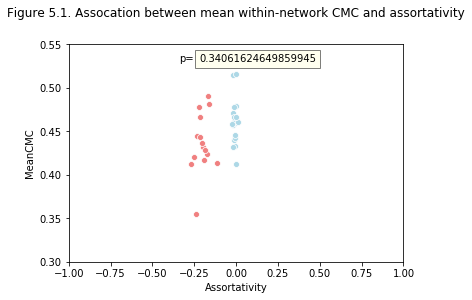

In [165]:
ax=sns.scatterplot(data=PartC_MS, x="Assortativity", y="MeanCMC", color="lightcoral")
ax=sns.scatterplot(data=PartC_ER, x="Assortativity", y="MeanCMC", color="lightblue")
ax.set(ylim=(0.3,0.55))
ax.set(xlim=(-1,1))
plt.text(-0.34,0.53, 'p=')
plt.text(-0.22,0.53, Rho_MA, bbox=dict(facecolor='lightyellow', alpha=0.5))
plt.title('Figure 5.1. Assocation between mean within-network CMC and assortativity', y=1.1)
plt.show()

Figure 5.2 shows the assocation between mean within network CMC and network connection density values. Since we do not add or remove a node or an edge while generating MS graphs, we see that we have exactly same connection density across all MS graphs, as it is expected. When we look at the results for ER graphs, we see that connection density values are gathered around 0.4. This is not suprising since we generate all ER graphs using the same probability of having an edge between two nodes, which is 0.4. As it is seen from the correlation value, mean within network CMC value is very low correlated or can be seen as not correlated. 

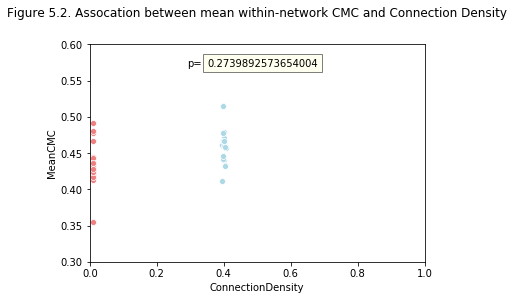

In [167]:
ax=sns.scatterplot(data=PartC_MS, x="ConnectionDensity", y="MeanCMC", color="lightcoral")
ax=sns.scatterplot(data=PartC_ER, x="ConnectionDensity", y="MeanCMC", color="lightblue")
ax.set(ylim=(0.3,0.6))
ax.set(xlim=(0,1))
plt.text(0.29,0.57, 'p=')
plt.text(0.35,0.57, Rho_MG, bbox=dict(facecolor='lightyellow', alpha=0.5))
plt.title('Figure 5.2. Assocation between mean within-network CMC and Connection Density', y=1.1)
plt.show()

References:

Stuart Oldham, Ben Fulcher, Linden Parkes, Aurina Arnatkeviciute, Chao Suo, and Alex Fornito. Consistency and differences between centrality metrics across distinct classes of networks. 2019.

Xiangrong Wang, Stojan Trajanovski, Robert E. Kooij, Piet Van Mieghema. Degree distribution and assortativity in line graphs of complex networks, Physica A, 445, 2016. 

Lawrence Page, Brin Sergey, Motwani Rajeev and Winograd Terry, The PageRank citation ranking: Bringing order to the Web. 1999.

Alex Fornito, Andrew Zalesky and Edward T. Bullmore, Fundamentals of Brain Network Analysis, 2016, Academic Press.
